In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 600

In [2]:
def integrand(u, v, epsilon=1e-3):
    return v**2 / ( (u-v)**2 + epsilon)

In [34]:
epsilon = 1e-3

u_array = np.linspace(-0.5, 0.5, 500)

quad_results = [integrate.quad(lambda v: integrand(u, v, epsilon=epsilon), a=-1, b=1) for u in u_array]
quad_values = np.array([res[0] for res in quad_results])

n_sample_array = [2**k for k in range(1,7)]

many_integrals = np.zeros((len(n_sample_array), len(u_array)))

for u_index, u in enumerate(u_array):
    for n_index, n_samples in enumerate(n_sample_array):
        v_array = np.linspace(-1, 1, n_samples)
        f_array = integrand(u, v_array, epsilon)
        integral = integrate.trapezoid(y=f_array, x=v_array)
        many_integrals[n_index, u_index] = integral

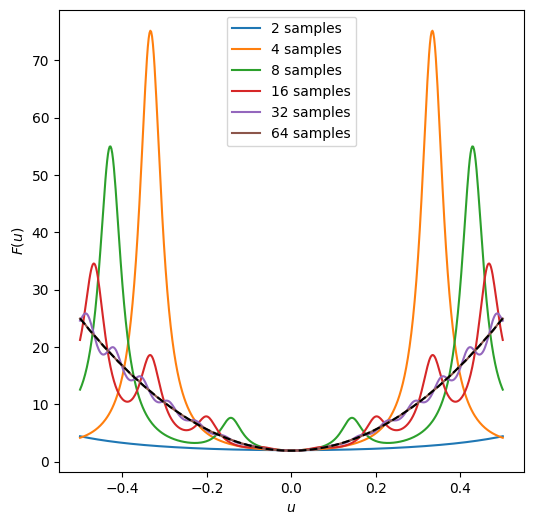

In [36]:
fig, ax = plt.subplots(figsize=(6,6))


for n_index, n in enumerate(n_sample_array):
    ax.plot(u_array, many_integrals[n_index], label=f"{n} samples")
ax.plot(u_array, quad_values, "k--")
ax.set_xlabel(r"$u$")
ax.set_ylabel(r"$F(u)$")
plt.legend()
plt.show()

In [3]:
from typing import Callable
class ObjectiveFunction:

    def __init__(self, fun: Callable, grad_u: Callable):
        
        self.fun = fun
        self.grad_u = grad_u

    def __call__(self,u, x):
        return self.fun(u, x)

    def grad_u(self, u, x):
        return self.grad_u(u, x)

def fun(u, x, epsilon = 1e-3):
    return x**2 / ( (u-x)**2 + epsilon)

def grad_u(u, x, epsilon = 1e-3):
    return ( x**2 / ( (u - x)**2 + epsilon)**2 ) * 2 * (u - x)

objective = ObjectiveFunction(fun, grad_u)
    

In [4]:
from scipy.spatial import Voronoi

voronoi = Voronoi(incremental=True)

TypeError: __init__() takes at least 2 positional arguments (1 given)

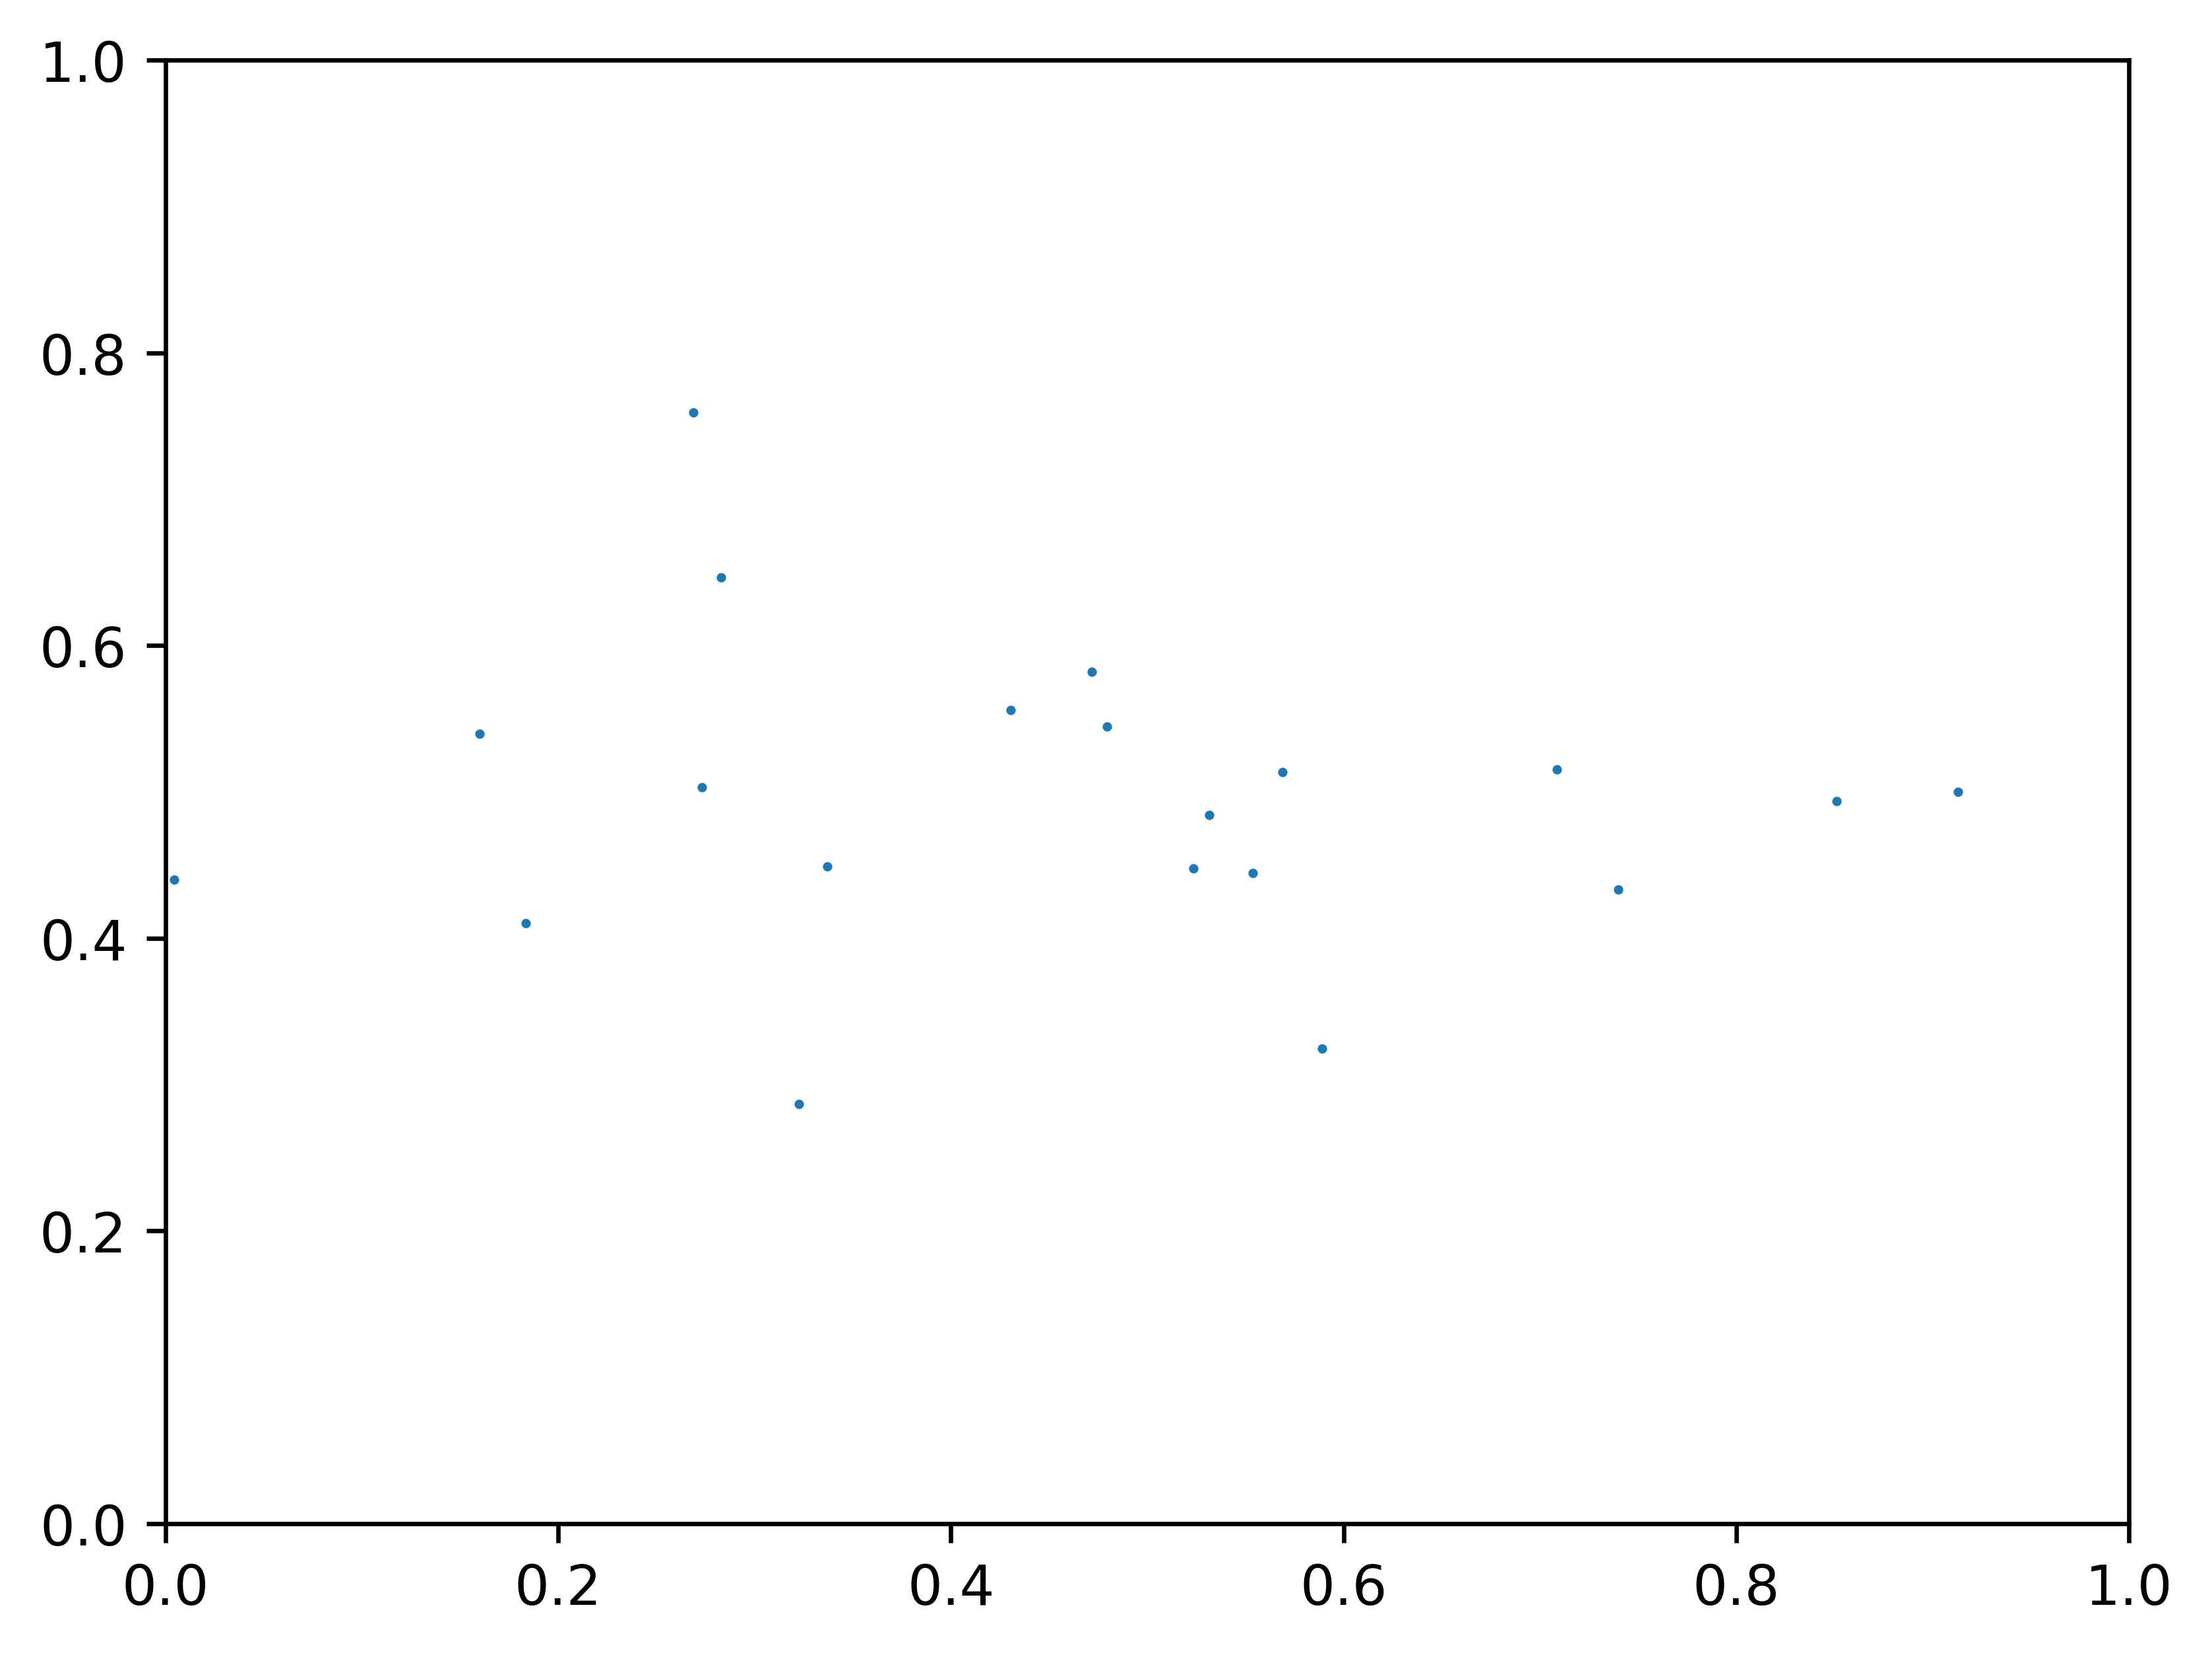

In [44]:
rng = np.random.default_rng()

u_solution = 0.5
u_array = np.clip(np.array([rng.uniform(u_solution - 0.5/np.power(n, 0.5), u_solution + 0.5/np.power(n, 0.5)) for n in range(2,22)]), 0, 1)
x_array = rng.uniform(size=20)

plt.scatter(x_array, u_array, marker=".", s=2)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

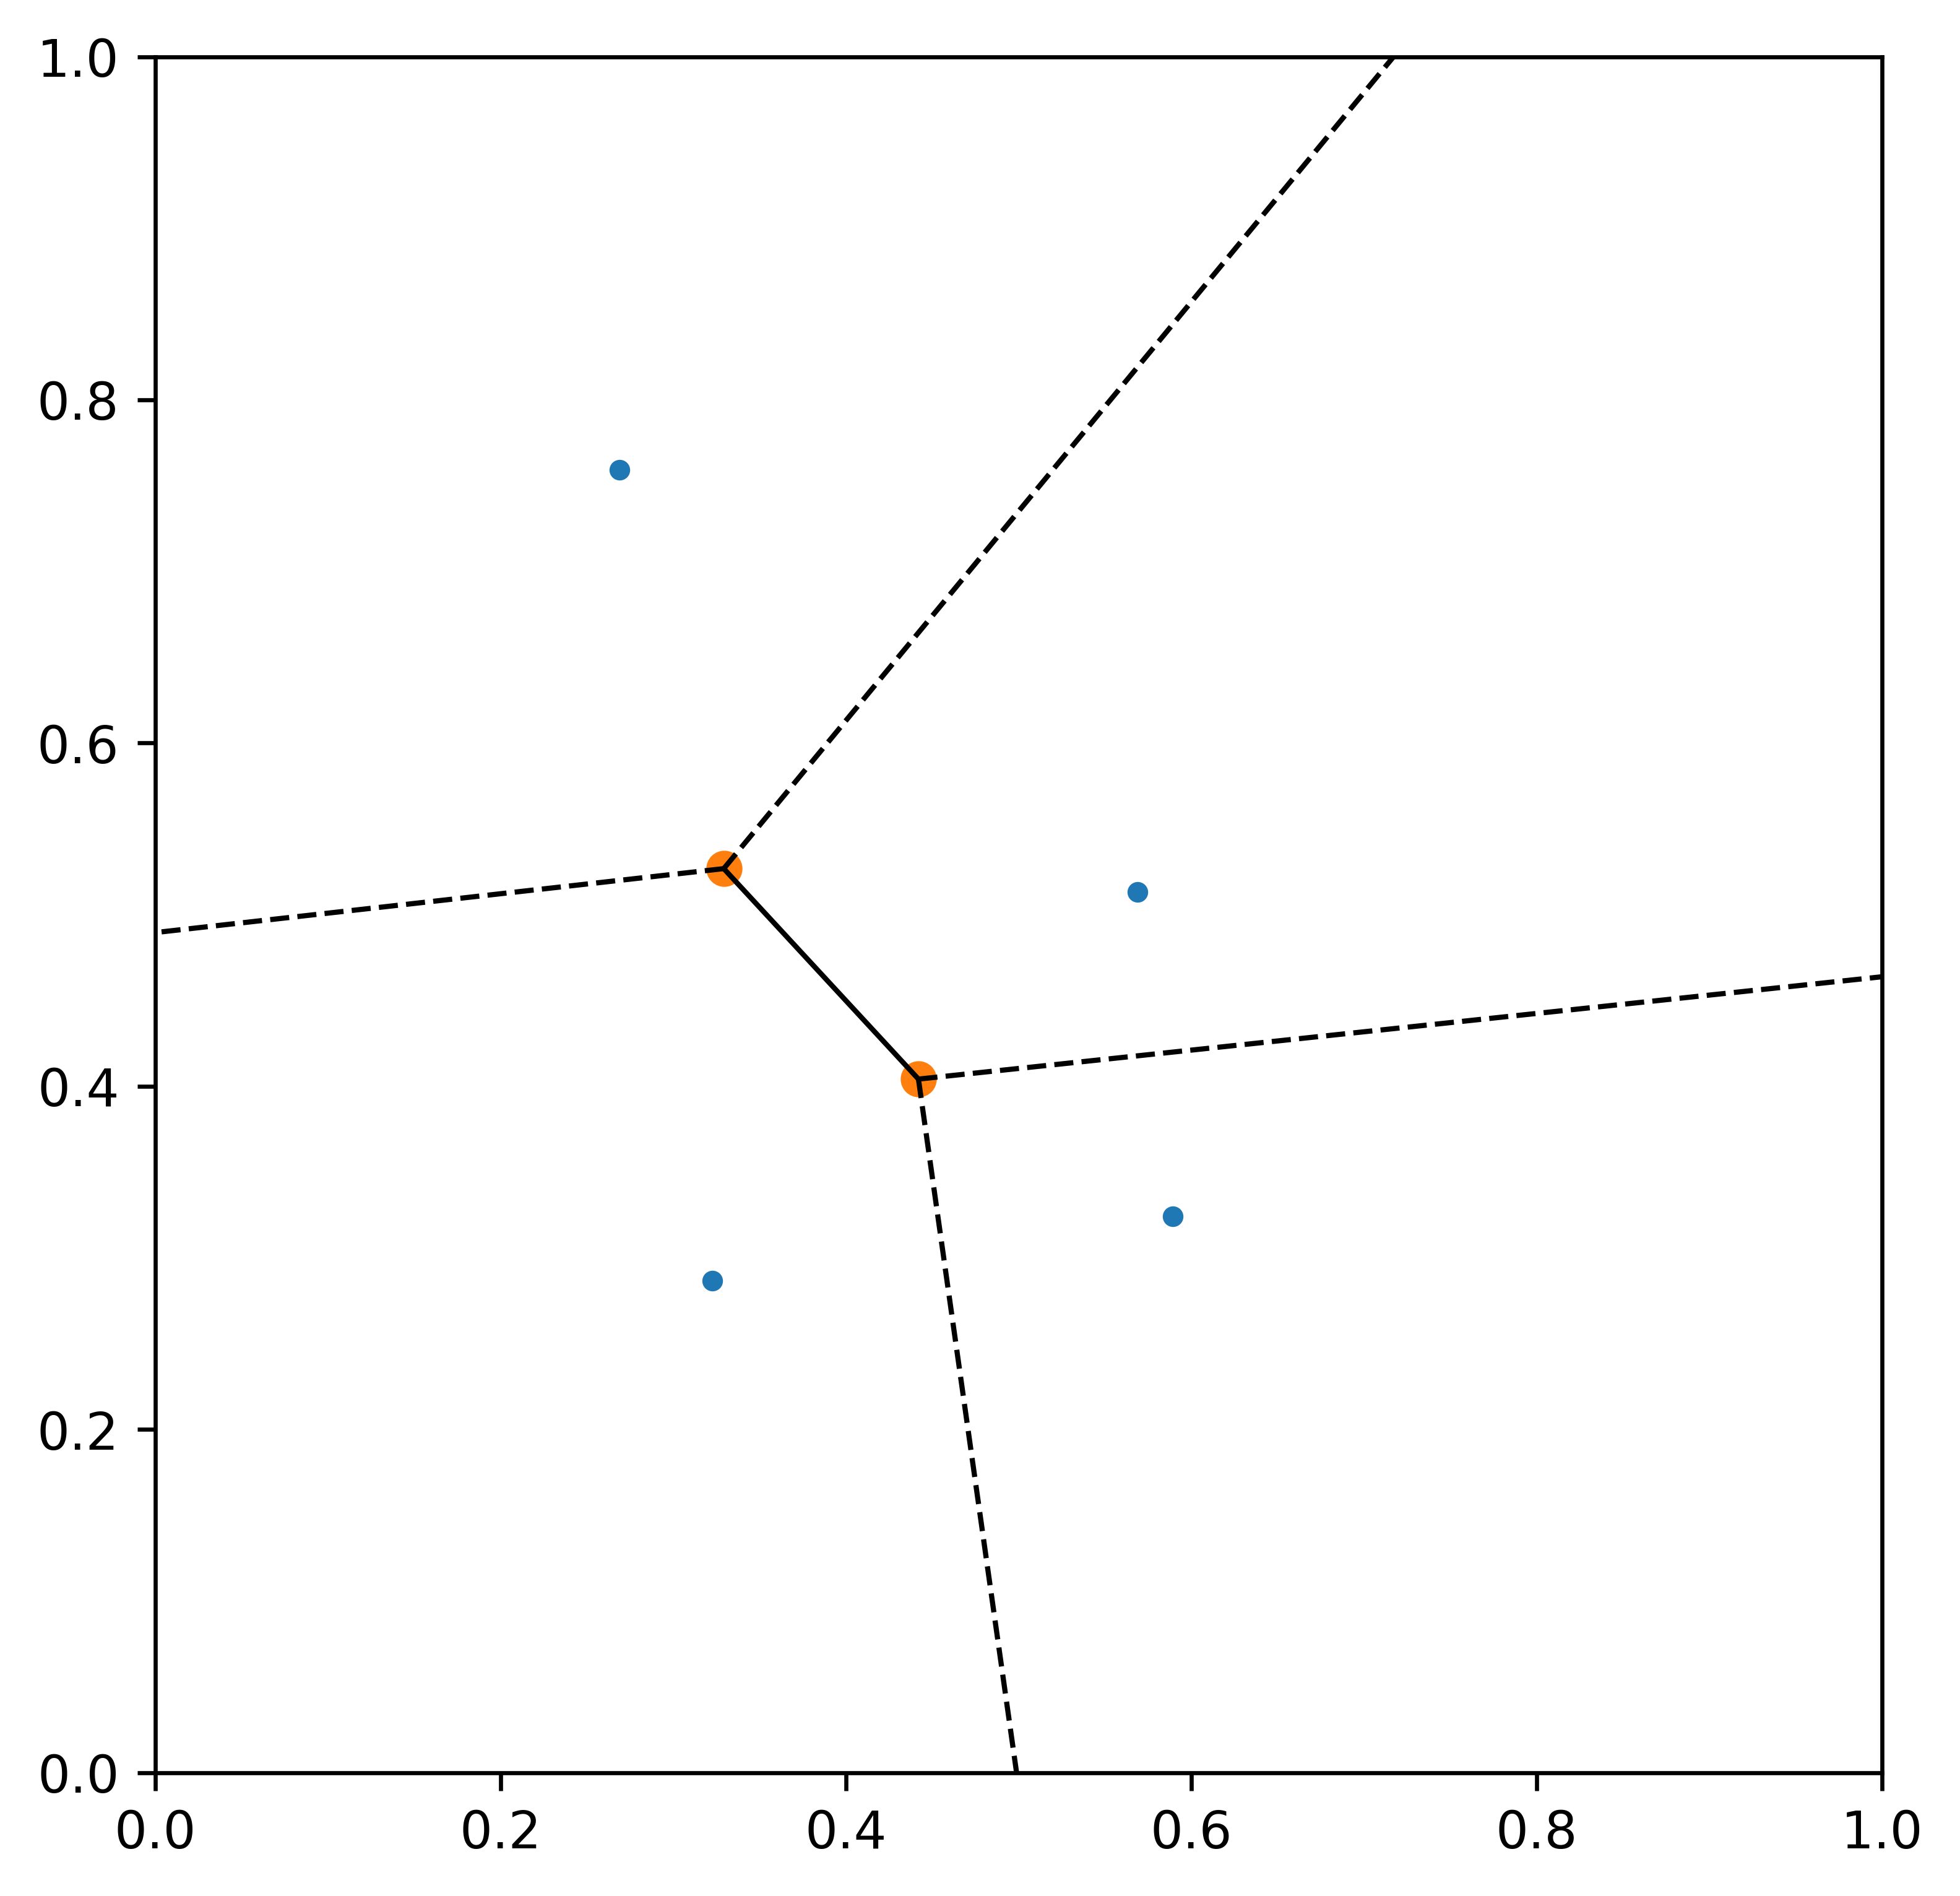

In [48]:
from scipy.spatial import Voronoi, voronoi_plot_2d

points = np.vstack([x_array, u_array]).T

voronoi = Voronoi(points=points[:4], incremental=True)
fig, ax = plt.subplots(figsize=(6,6))
voronoi_plot_2d(voronoi, ax=ax)
ax.set_xlim(0, 1)
ax.set_ylim(0,1)
plt.savefig("voronoi_04.png")
plt.show()

In [49]:
for i in range(5, 20):
    fig, ax = plt.subplots(figsize=(6,6))
    voronoi.add_points([points[i]])
    ax.axhline(points[i, 1], ls="--", color="tab:blue")
    voronoi_plot_2d(voronoi, ax=ax)
    ax.set_xlim(0, 1)
    ax.set_ylim(0,1)
    plt.savefig(f"voronoi_{i:02d}.png")
    plt.close()
